## Week 4 Mini-Project: NLP Disaster Tweets Kaggle Mini-Project

#### By Julian Moscotte

### Introduction

In this project we will be looking to classify tweets as real Disaster or not using a machine learning model. We will be working with a dataset that contains 10,000 tweets that includes text data, location data (may be blank), and a keyword (also may be blank). 

### Exploratory Data Analysis (EDA)

First let's outline our dataset's columns:

- id: A unique identifier for each tweet
- text: the text of the tweet
- location: the location the tweet was sent from (may be blank)
- keyword: A keyword from the tweet (may be blank)  
- target: ** In train dataset ** denoting if the tweet is about a real disaster or not (0) or (1)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# Display the first few rows of the training data
print(train_data.head())

# Summary statistics of the dataset
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())




# Check for duplicate rows in the training data
duplicate_rows = train_data[train_data.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

print(f'Dataset Size: {len(train_data)}')

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Number of duplicate rows: 0
Dataset Size: 7613


From the above code we can see some summary statistics of the data as well as noting that there are no empty datapoints and duplicates. Along with this, we see that our training set has a size of 7613. Now lets take a look at some of the statistical properties visually.  

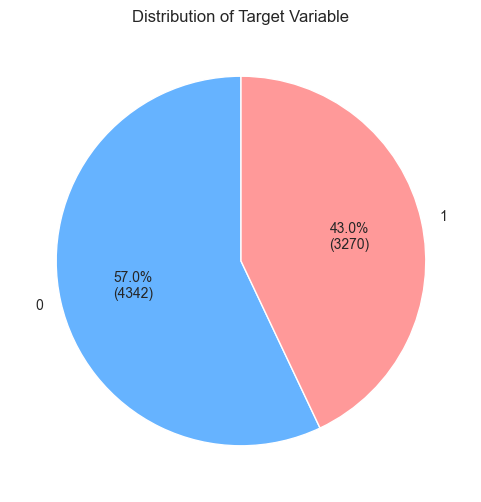

In [25]:
# Function to show both count and percentage on the pie chart
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plot the distribution of the target variable as a pie chart with counts and percentages
plt.figure(figsize=(6,6))
train_data['target'].value_counts().plot.pie(autopct=lambda pct: func(pct, train_data['target'].value_counts()), startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Target Variable')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()

Here we can see a numeric visualization of the distribution of real disaster tweets to non-disaster tweets in the dataset. Lets take a look at the keywords data.

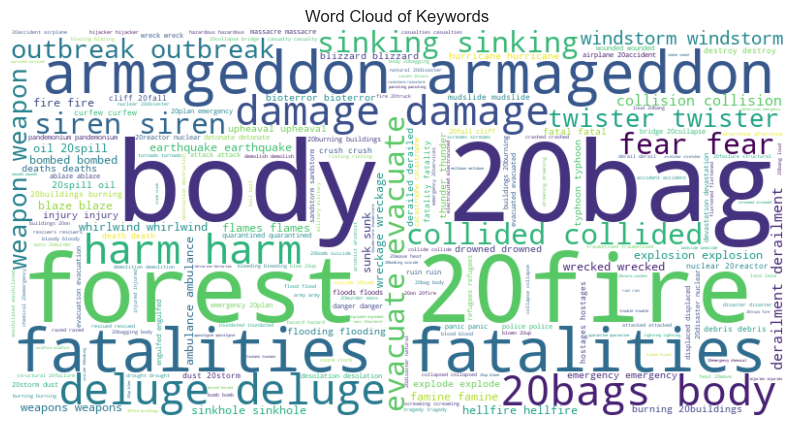

C:\Users\jmosc\AppData\Local\Temp\ipykernel_30440\223842147.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, hue=None, palette='viridis', legend=False)


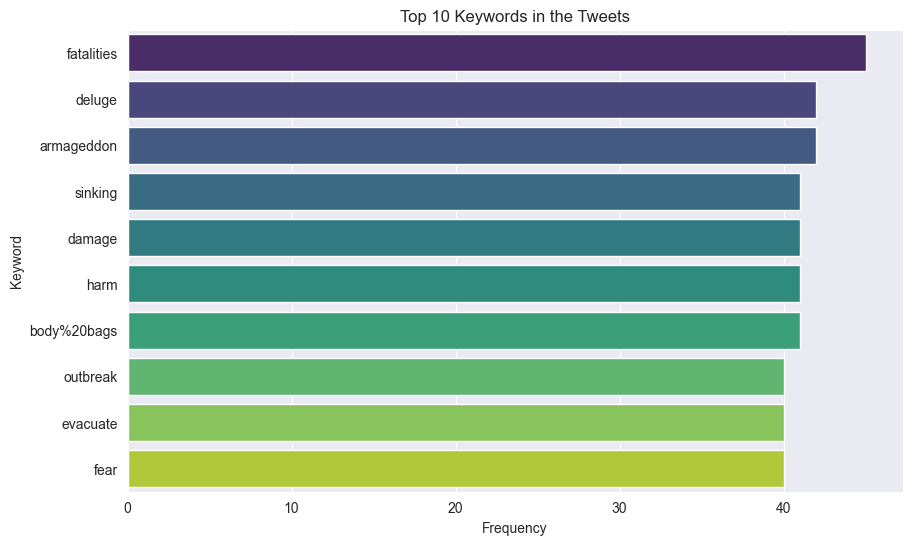

In [26]:
from wordcloud import WordCloud

# Combine all keywords into a single string
keyword_text = ' '.join(train_data['keyword'].dropna().values)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

# Plot the top 10 keywords
plt.figure(figsize=(10,6))
top_keywords = train_data['keyword'].value_counts().head(10)
sns.barplot(x=top_keywords.values, y=top_keywords.index, hue=None, palette='viridis', legend=False)
plt.title('Top 10 Keywords in the Tweets')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()




Here we get a word cloud visual of the most frequent words in the keywords. From this we can see that there's quite a bit of similar words and some that may seem fairly informal. This is the challenge with this dataset because we have Natural Language in the tweets which is not always conventional and can be more difficult to process. From the list of the Top keywords we definitely see language that might be pointing to a real disaster happening. Lets check the difference between the labeled disasters and non disasters top words. 

C:\Users\jmosc\AppData\Local\Temp\ipykernel_30440\2253575110.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keywords_target_1.values, y=keywords_target_1.index, ax=axes[0], palette='viridis', legend=False)
C:\Users\jmosc\AppData\Local\Temp\ipykernel_30440\2253575110.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keywords_target_0.values, y=keywords_target_0.index, ax=axes[1], palette='viridis', legend=False)


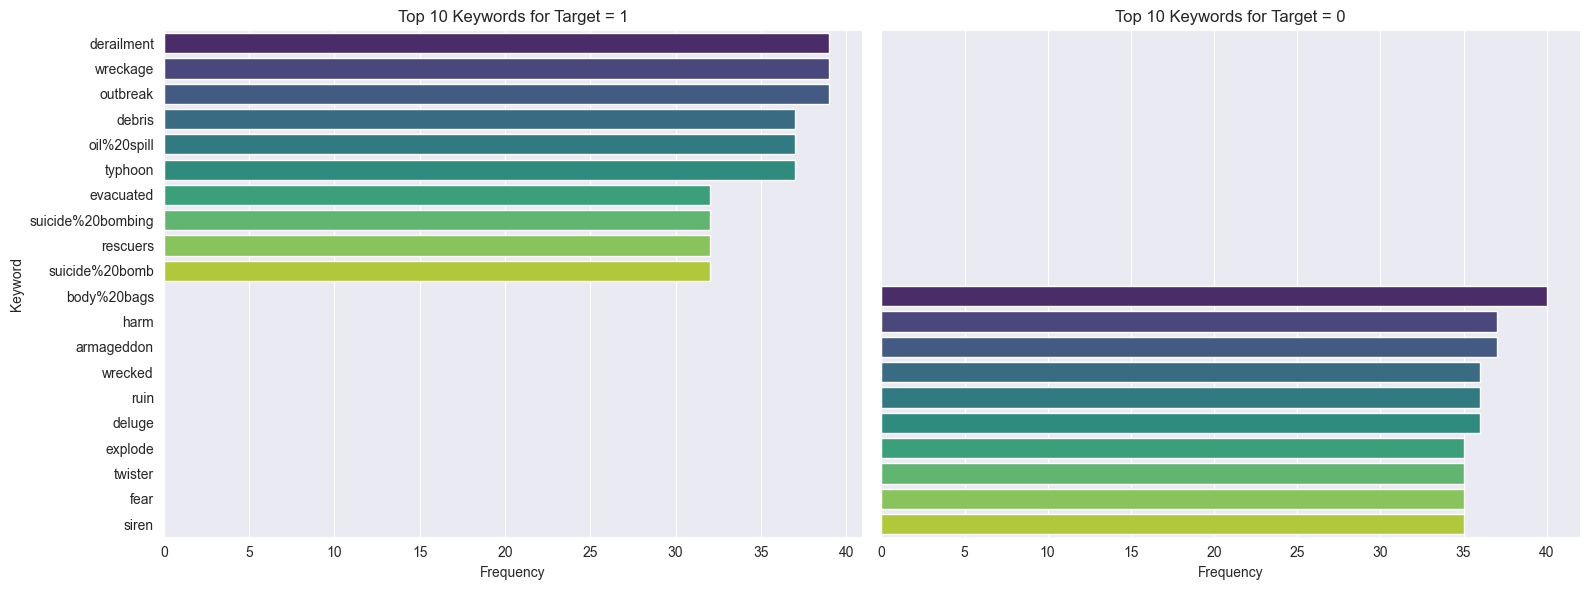

In [27]:
# Prepare data for target = 1
keywords_target_1 = train_data[train_data['target'] == 1]['keyword'].value_counts().head(10)

# Prepare data for target = 0
keywords_target_0 = train_data[train_data['target'] == 0]['keyword'].value_counts().head(10)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for target = 1
sns.barplot(x=keywords_target_1.values, y=keywords_target_1.index, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Top 10 Keywords for Target = 1')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Keyword')

# Plot for target = 0
sns.barplot(x=keywords_target_0.values, y=keywords_target_0.index, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Top 10 Keywords for Target = 0')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Keyword')

# Display the plots
plt.tight_layout()
plt.show()

While this keyword data is not indicative of the whole dataset since not all tweets have data for it, we can still see a divergence of the top keywords for the real disaster tweets and the non-disaster tweets. Lastly lets take a look at the distribution of locations in general, then by disaster label. 

C:\Users\jmosc\AppData\Local\Temp\ipykernel_30440\1149418698.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_location_counts.values, y=overall_location_counts.index, palette='viridis', ax=axes[0])
C:\Users\jmosc\AppData\Local\Temp\ipykernel_30440\1149418698.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_1_location_counts.values, y=target_1_location_counts.index, palette='viridis', ax=axes[1])
C:\Users\jmosc\AppData\Local\Temp\ipykernel_30440\1149418698.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target

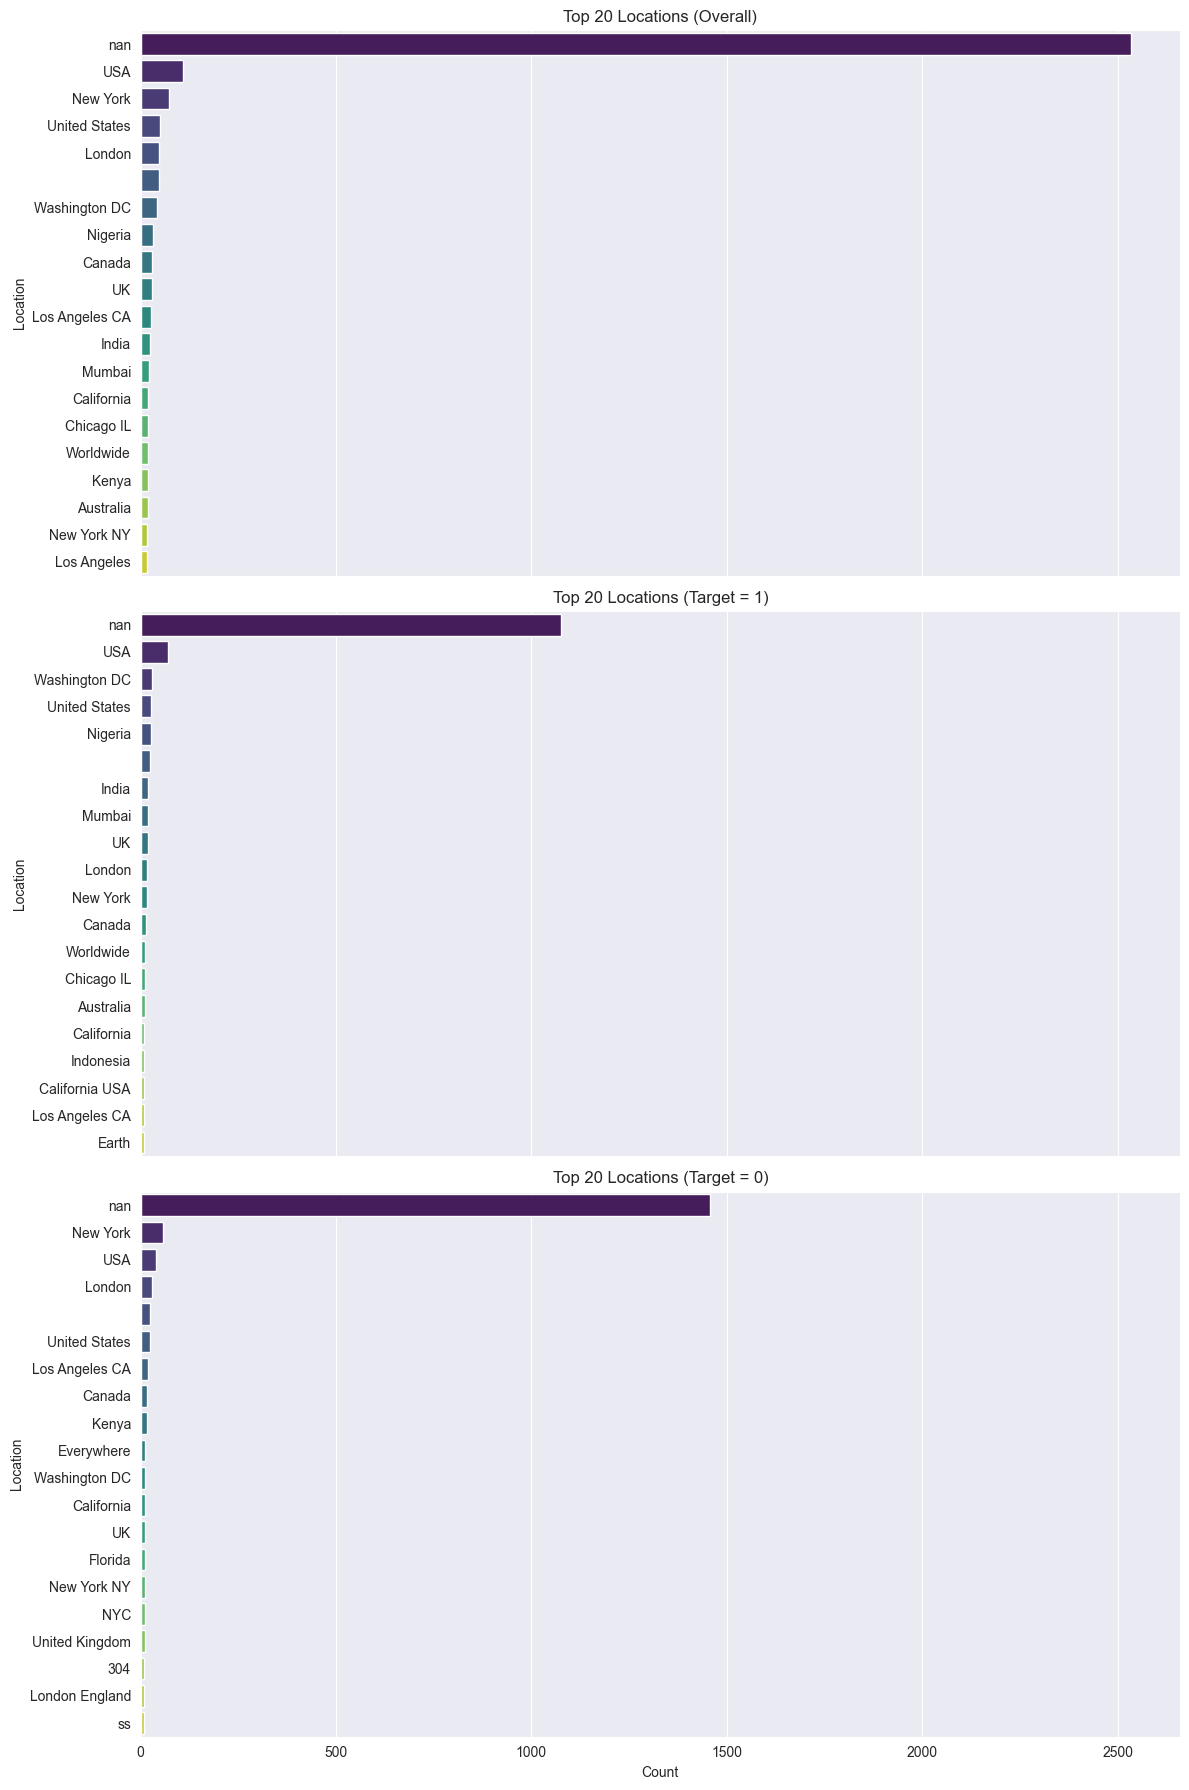

In [28]:
# Set up the matplotlib figure
train_data['location'] = train_data['location'].astype(str).str.replace(r'[^\w\s]', '', regex=True).str.strip()

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot top 20 locations overall (excluding NaN values)
overall_location_counts = train_data['location'].dropna().value_counts().head(20)
sns.barplot(x=overall_location_counts.values, y=overall_location_counts.index, palette='viridis', ax=axes[0])
axes[0].set_title('Top 20 Locations (Overall)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Location')

# Plot top 20 locations for target = 1 (excluding NaN values)
target_1_location_counts = train_data[train_data['target'] == 1]['location'].dropna().value_counts().head(20)
sns.barplot(x=target_1_location_counts.values, y=target_1_location_counts.index, palette='viridis', ax=axes[1])
axes[1].set_title('Top 20 Locations (Target = 1)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Location')

# Plot top 20 locations for target = 0 (excluding NaN values)
target_0_location_counts = train_data[train_data['target'] == 0]['location'].dropna().value_counts().head(20)
sns.barplot(x=target_0_location_counts.values, y=target_0_location_counts.index, palette='viridis', ax=axes[2])
axes[2].set_title('Top 20 Locations (Target = 0)')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Location')

# Adjust layout
plt.tight_layout()
plt.show()

The location distributions don't really give us much but its always extra data to work off so we'll see if we can use this in our model building. 

Overall, based on our inspection of the data we can see that Location and keyword might be an issue to use since not all datapoints have values for that. We'll keep that in mind for the next step of our project. We can also see that we're going to need some text preprocessing, something like lowercasing, reming punctuation/special characters, and other NLP techniques to standardize this data more. The plan from here will be to use tokenization and Embedding as the text prep to build a CNN for text classification. 

### Model Architecture

For this problem, I will be using a Convolutional Neural Network with an embedding layer. This architecture is very good for text classification tasks because CNN's are good are finding local patterns and features such as phrases or word combos which help with determining the context of a tweet. They are also particularly good at parameter efficiency since they do not rely on sequential data processing. 

This CNN will contain several different layers, the first of which is an Embedding layer that converts words into dense vectors. Then we'll have some convolutional layers to apply convolution operations and extract n-gram features. Next we'll have a Pooling layer to reduce the dimensionality of the feature maps while retaining the most important features. Lastly we'll have fully connected layers that combine the extracted features and make a final prediction. 

#### Word Embedding Strategy

For the word embedding, we'll use GloVe (Global Vectors for Word Representation). This is an unsupervised learning algorithm that maps words into vectors where similar words are closer. Generally this is to capture the global statistics by aggregating word co-occurrence matrices, allowing the model to use the relationships between words effectively. Now lets get to the model creation, with the first step being to preprocess the data. 


In [29]:
import numpy as np
import random
import tensorflow as tf
import os

# Set a seed value
seed_value = 42

# 1. Set the seed for numpy
np.random.seed(seed_value)

# 2. Set the seed for Python's built-in random module
random.seed(seed_value)

# 3. Set the seed for TensorFlow
tf.random.set_seed(seed_value)

# 4. Set the seed for any environment variables (if applicable)
os.environ['PYTHONHASHSEED'] = str(seed_value)

# Optional: Configure TensorFlow to run deterministically (slower, but ensures reproducibility)
tf.config.experimental.enable_op_determinism()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.initializers import Constant

# Load the data
train_data = pd.read_csv('./data/train.csv')

# Fill missing values in 'keyword' and 'location' columns
train_data['keyword'] = train_data['keyword'].fillna('')
train_data['location'] = train_data['location'].fillna('')

# Combine 'text', 'keyword', and 'location' into one string for better context in training data
train_data['text'] = train_data['keyword'] + ' ' + train_data['location'] + ' ' + train_data['text']

# Preprocessing the text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # remove special characters
    text = text.lower().strip()  # convert to lower case and strip whitespace
    return text

train_data['text'] = train_data['text'].apply(clean_text)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['target'], test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences
max_len = 100 
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

# Convert target to numpy array
y_train = np.array(y_train)
y_val = np.array(y_val)

# Load GloVe Embeddings
embedding_dim = 100  # GloVe embedding dimension (e.g., 100, 200, 300)
glove_file = './data/glove.6B.100d.txt'  

def load_glove_embeddings(filepath, embedding_dim):
    embeddings_index = {}
    with open(filepath, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embeddings_index = load_glove_embeddings(glove_file, embedding_dim)

# Create the Embedding Matrix
word_index = tokenizer.word_index
vocab_size = min(len(word_index) + 1, 20000)  # Using a vocab size of 20,000 or total words in the tokenizer

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Now that we've got the data processed, we can build the CNN model and train it using the training dataset, while checking our accuracy with the validation set. 

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D

# Set parameters
vocab_size = len(tokenizer.word_index) + 1  # Total number of words in the vocabulary
embedding_dim = 100  # Size of the embedding vectors
num_filters = 64
kernel_size = 5
dropout_rate = 0.5

# Build the Model
basic_model = Sequential()

# Embedding Layer with GloVe embeddings
basic_model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    embeddings_initializer=Constant(embedding_matrix),  
                    trainable=False))  # GloVe embeddings are not trainable

# Add a Conv1D layer
basic_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
basic_model.add(MaxPooling1D(pool_size=5))

# Global Max Pooling
basic_model.add(GlobalMaxPooling1D())

# Dense layers
basic_model.add(Dense(128, activation='relu'))
basic_model.add(Dropout(0.5))
basic_model.add(Dense(1, activation='sigmoid'))

# Compile the model
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Results and Analysis

Now lets train and test the model we've created:

In [32]:
# Train the model
history = basic_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val))

# Evaluate the model on validation data
val_loss, val_accuracy = basic_model.evaluate(X_val_pad, y_val, verbose=2)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6791 - loss: 0.5866 - val_accuracy: 0.7997 - val_loss: 0.4474
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8078 - loss: 0.4290 - val_accuracy: 0.7965 - val_loss: 0.4419
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8473 - loss: 0.3577 - val_accuracy: 0.8004 - val_loss: 0.4785
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8834 - loss: 0.2887 - val_accuracy: 0.7873 - val_loss: 0.5397
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9283 - loss: 0.2047 - val_accuracy: 0.7925 - val_loss: 0.6065
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9483 - loss: 0.1613 - val_accuracy: 0.7925 - val_loss: 0.6222
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9267 - loss: 0.1972 - val_accuracy: 0.7958 - val_loss: 0.5841
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9441 - loss: 0.1550 - val_accuracy: 

From the output above, after 10 epochs, we get an accuracy of 0.9766 on the training set, and a 0.7866 on the validation set. This isn't as great as I would like it, so lets see how we can improve on this. After my research on the ways to improve the model we are going to implement a Long Short-Term Memory (LSTM) layer. Lets see if that can improve the accuracy. 

In [33]:
from tensorflow.keras.layers import Bidirectional, LSTM, BatchNormalization
from tensorflow.keras.initializers import Constant

# Build the Model
lstm_model = Sequential()

# Embedding Layer with GloVe embeddings
lstm_model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    trainable=False))  # GloVe embeddings are not trainable

# Add a Conv1D layer
lstm_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
lstm_model.add(MaxPooling1D(pool_size=5))

# Add LSTM layer
lstm_model.add(LSTM(64, return_sequences=False))  # Adjust the number of units based on your needs

# Dense layers
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val))

# Evaluate the model on validation data
val_loss, val_accuracy = lstm_model.evaluate(X_val_pad, y_val, verbose=2)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6885 - loss: 0.5939 - val_accuracy: 0.7991 - val_loss: 0.4469
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8022 - loss: 0.4497 - val_accuracy: 0.8070 - val_loss: 0.4485
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8247 - loss: 0.4023 - val_accuracy: 0.8037 - val_loss: 0.4722
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8463 - loss: 0.3574 - val_accuracy: 0.8056 - val_loss: 0.5517
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8839 - loss: 0.2969 - val_accuracy: 0.7774 - val_loss: 0.5897
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8910 - loss: 0.2931 - val_accuracy: 0.7794 - val_loss: 0.7014
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9060 - loss: 0.2512 - val_accuracy: 0.7354 - val_loss: 1.0274
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8843 - loss: 0.2864 - val_accuracy: 

Here we have a slightly worse accuracy at 0.7859 from the validation step. I have one more thing to add to potentially get this to a better place. We'll take a look at using Bidirectional LSTM. 

In [34]:
# Build the Model with Bidirectional LSTM
bi_lstm_model = Sequential()

# Embedding Layer with GloVe embeddings
bi_lstm_model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    input_length=max_len, 
                    trainable=False))  # GloVe embeddings are not trainable

# Add Bidirectional LSTM Layer
bi_lstm_model.add(Bidirectional(LSTM(100, return_sequences=True)))
bi_lstm_model.add(Dropout(0.5))

# Global Max Pooling
bi_lstm_model.add(tf.keras.layers.GlobalMaxPooling1D())

# Dense layers
bi_lstm_model.add(Dense(128, activation='relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = bi_lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val))

# Evaluate the model
val_loss, val_accuracy = bi_lstm_model.evaluate(X_val_pad, y_val, verbose=2)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Epoch 1/10


C:\Users\jmosc\OneDrive\OMDS\Intro to Deep Learning\Week 4 Mini-Project\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.7097 - loss: 0.5594 - val_accuracy: 0.8056 - val_loss: 0.4792
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8041 - loss: 0.4513 - val_accuracy: 0.8122 - val_loss: 0.4667
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8166 - loss: 0.4239 - val_accuracy: 0.8129 - val_loss: 0.4532
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8245 - loss: 0.4065 - val_accuracy: 0.8148 - val_loss: 0.4429
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8321 - loss: 0.3843 - val_accuracy: 0.8102 - val_loss: 0.4417
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8416 - loss: 0.3626 - val_accuracy: 0.8116 - val_loss: 0.4445
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8602 - loss: 0.3361 - val_accuracy: 0.8017 - val_loss: 0.4358
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8729 - loss: 0.3115 - val_accuracy: 0.80

Lets take a look at how the 3 different models performed on the training and validation sets. 

| Architecture       | Training Accuracy | Validation Accuracy |
|--------------------|-------------------|---------------------|
| Basic CNN          | 0.9766              | 0.7866                |
| + LTSM             | 0.9409           | 0.7859                  |
| + Bidirection LTSM | 0.8982            | 0.794               |


An interesting trend we see is a the Training accuracy going down while the Validation Accuracy creeps up. That does bode well for data sets it hasnt seen before. Lets take a look at how this does with the real test data. 

In [35]:
# Load the test data
test_data = pd.read_csv('./data/test.csv')

# Fill missing values in 'keyword' and 'location' columns
test_data['keyword'] = test_data['keyword'].fillna('')
test_data['location'] = test_data['location'].fillna('')

# Combine 'text', 'keyword', and 'location' into one string for better context in test data
test_data['text'] = test_data['keyword'] + ' ' + test_data['location'] + ' ' + test_data['text']

# Preprocess the test text data (same preprocessing steps as train data)
test_data['text'] = test_data['text'].apply(clean_text)

# Tokenize and pad sequences for the test data
X_test_seq = tokenizer.texts_to_sequences(test_data['text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Make predictions on the test data
basic_y_test_pred = basic_model.predict(X_test_pad)
lstm_y_test_pred = lstm_model.predict(X_test_pad)
bi_lstm_y_test_pred = bi_lstm_model.predict(X_test_pad)

# Convert probabilities to binary predictions (0 or 1)
basic_y_test_pred_binary = (basic_y_test_pred > 0.5).astype(int)
lstm_y_test_pred_binary = (lstm_y_test_pred > 0.5).astype(int)
bi_lstm_y_test_pred_binary = (bi_lstm_y_test_pred > 0.5).astype(int)

basic_submission = pd.DataFrame({
    'id': test_data['id'],
    'target': basic_y_test_pred_binary.flatten()  # Flatten to convert to a 1D array
})

lstm_submission = pd.DataFrame({
    'id': test_data['id'],
    'target': lstm_y_test_pred_binary.flatten()  # Flatten to convert to a 1D array
})

bi_lstm_submission = pd.DataFrame({
    'id': test_data['id'],
    'target': bi_lstm_y_test_pred_binary.flatten()  # Flatten to convert to a 1D array
})

basic_submission.to_csv('basic_submission.csv', index=False)
lstm_submission.to_csv('lstm_submission.csv', index=False)
bi_lstm_submission.to_csv('bi_lstm_submission.csv', index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


Here are the results of the kaggle accuracy for the 3 models:

![Alt text](Kaggle_Result.png)

As we can see we have the best result from our Bidirectional LSTM model. 

While I didn't keep the code in the project since it was fairly computationally significant, I did test some Hyperparameter tuning, specifically fiddling around with the batch size, learning rate, and number of epochs. While they did come with a small amount of increased accuracy, they also came with a ton more computing needs as well as time to process. I deemed it not worth the required resources. 

One thing that was somewhat successful was the architechture variations we used. I tested 3 different models, a basic CNN as described before, one with an added LSTM layer, and then another with a bidirectional LSTM layer. We saw incremental improvement with each which was then confirmed in the kaggle competition results. Based on the validation and kaggle results we can see here that the bidirectional LSTM model did the best with a fairly decent score of 0.80 accuracy. 

#### Conclusion

The Bidirectional LSTM model trained with GloVe embeddings achieved a validation accuracy of 0.80 aftter 10 epochs. Similarly, the same model achieved an accuracy of 0.80 on the test data set as well. This demonstrates that this model was the best model and performed fairly well on both sets. 

Some things that worked really well in this project is the GloVe embeddings that proviced a contextualized representations of the words, allowing the model to better understand the nuances of the tweets. Bidirectional LSTM made a difference here as well since it improved the LSTM layer's ability to capture context as well. Lastly I also used dropout layers that helped reduce overfitting by preventing it from being to reliant on any single feature. 

Some things that didn't help much was the hyperparameter tuning, it proved to be resource intensive with only small amounts of accuracy benefits. Some takeaways from this project is that pre-trained embeddings really matter as they greatly improve performance by allowing natural language to be better understood. 

In the future we can try to create models with better hyperparameters as well as more computational power. We can also combine LSTM with other models to see how they can help eachother. There is a lot of work to do here and this model can absolutely be improved, however as we saw, this difficult task has been done fairly well with our GloVe Embedded, Bidirectional LSTM CNN model. 

#### Resources

https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/
https://nlp.stanford.edu/projects/glove/
https://medium.com/@anishnama20/understanding-bidirectional-lstm-for-sequential-data-processing-b83d6283befc
